In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("churn.csv")

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### CustomerId : Müşteriye atanan ID numarası Sürekli Bir değişkendir
##### Surname : Müşterinin Soyadı 
##### CreditScore : Müşterinin Kredi Skoru Sürekli bir değişkendir
##### Geopraphy : Müşterinin Kökeni kategorik bir değişkendir
##### Gender : Müşterinin Cinsiyeti kategorik değişkendir
##### Age : Müşterinin Yaşı Kesikli bir değişkendir
##### Tenure : Müşterinin Kaç yıldır müşteri olduğu kesikli bir değişkendir
##### Balance : Anlık Para sürekli bir değişkendir
##### NumOfProducts : Müşterinin Banka aracalığıyla aldığı ürün kesikli bir değişkendir
##### HasCrCard : Müşterinin bankaya ait olduğu kredi kartı sayısı kesikli bir değişkendir
##### İsActiveMember : Müşterinin Aktif hesabı olup olmadığı sayısal kategorik değişken
##### EstimatedSalary : Tahmini Maaş sürekli değişken
##### Exited : Müşterinin Bankadan ayrılıp ayrılmadığını sayısal kategorik değişken 

In [6]:
# Burada RowNumber kolonu bize her hangi bir bilgi ifade etmeyeceği için siliyoruz.
data.drop(["RowNumber"],axis=1,inplace=True)

In [7]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# burada kategorik olarak belirlediğimiz kolonları object'ten kategoriye çevirioyruz
category = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]
for i in category:
    data[i] = data[i].astype("category")
    

In [10]:
data.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [11]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Burada Kredi skor ortalamasını hesaplıyoruz
krediSkorOrtalama = data["CreditScore"].mean()
varlıkDurumu = data["EstimatedSalary"].mean()
print("Kredi Skor Ortalama: ",krediSkorOrtalama)
print("Varlık Durumu Ortalama: ",varlıkDurumu)

Kredi Skor Ortalama:  650.5288
Varlık Durumu Ortalama:  100090.239881


In [13]:
# İlk olarak kredi skor durumunu belli edicek bir değişken oluşturalım
data["KrediSkorDurumu"] = ["Düşük" if i < krediSkorOrtalama else "Yüksek" for i in data["CreditScore"]]

In [14]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Düşük
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Düşük
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Düşük
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Yüksek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Yüksek
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Düşük
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Yüksek
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Yüksek


In [15]:
# sonrasında bankaya sağdık ve sağdık değil diye bir değişken oluşturalım
data["SadıklıkDurumu"] = ["Sadık" if i >=5 else "Sadık Değil" for i in data["Tenure"]]

In [16]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Düşük,Sadık Değil
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Düşük,Sadık Değil
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Düşük,Sadık
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek,Sadık Değil
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Yüksek,Sadık Değil


In [17]:
# daha sonra ise bu elimizdeki veriye göre zengin olup olmadığını belirleyelim (bunu yaparken de varlık durumunu baz alıcaz)
data["ZenginlikDurumu"] = ["Varlıklı" if i >= varlıkDurumu else "Varlıksız" for i in data["EstimatedSalary"]]

In [18]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Düşük,Sadık Değil,Varlıklı
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Düşük,Sadık Değil,Varlıklı
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Düşük,Sadık,Varlıklı
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek,Sadık Değil,Varlıksız
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Yüksek,Sadık Değil,Varlıksız


In [19]:
# Şu anki varlığı ortalama maaşından düşük mü ?
data["VarlığıOrtalamaMaaştanDüşük"] = ["Düşük" if i < varlıkDurumu else "Yüksek" for i in data["EstimatedSalary"]]

In [20]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Düşük,Sadık Değil,Varlıklı,Yüksek
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Düşük,Sadık Değil,Varlıklı,Yüksek
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Düşük,Sadık,Varlıklı,Yüksek
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek,Sadık Değil,Varlıksız,Düşük
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Yüksek,Sadık Değil,Varlıksız,Düşük


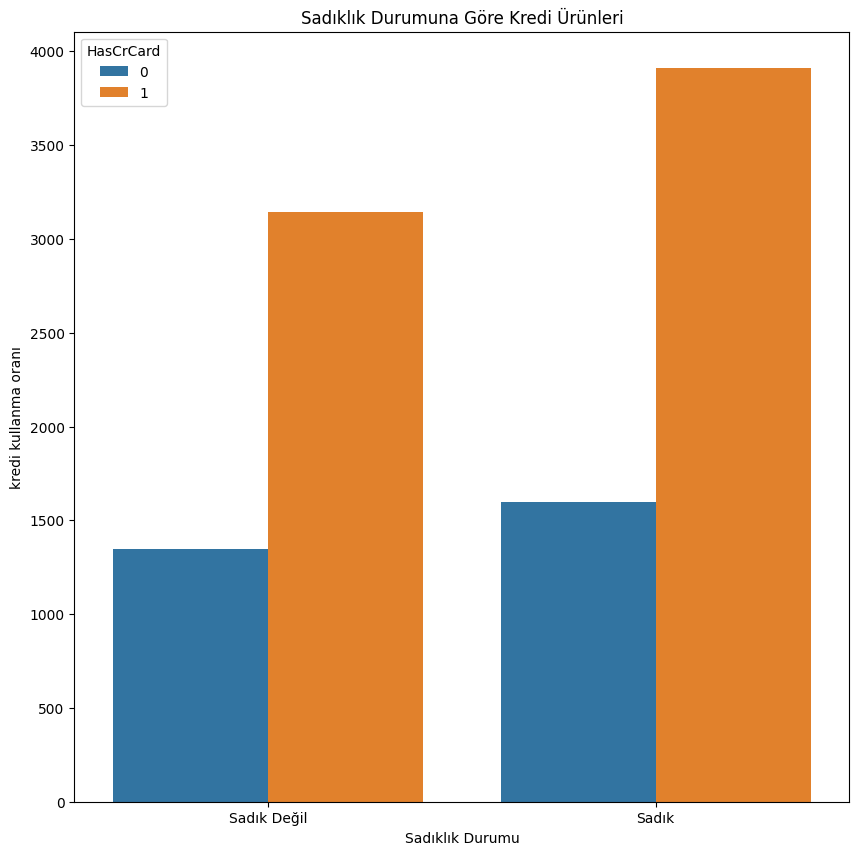

In [21]:
# Burada Sadıklık durumunun kredi ürünleri ile alaksı var mı diye bakıyoruz
# Frekans dağılımını kullanalım
plt.figure(figsize=(10,10))
plt.title("Sadıklık Durumuna Göre Kredi Ürünleri")
plt.xlabel("Sadıklık Durumu")
plt.ylabel("kredi kullanma oranı")
sns.countplot(x="SadıklıkDurumu",hue="HasCrCard",data=data)
plt.show()

In [22]:
# bunu istatistiksel testler ile de doğrulayalım
from scipy.stats import chi2_contingency
soru1 = chi2_contingency(pd.crosstab(data["HasCrCard"],data["SadıklıkDurumu"]))
#H0: İlişki Yoktur
#H1: İlişki Vardır
# beklenene değer frekansı oluştur ve %5'in altında beklenen değer varsa Fishcer excat ki kare testi uygula

In [23]:
soru1
# burada p değerimiz "0.289" çıktı yani 0.05'ten büyük olduğu için H0 hipotezini reddedemiyoruz.

Chi2ContingencyResult(statistic=1.1219820883900833, pvalue=0.2894920590523776, dof=1, expected_freq=array([[1621.517, 1323.483],
       [3884.483, 3170.517]]))

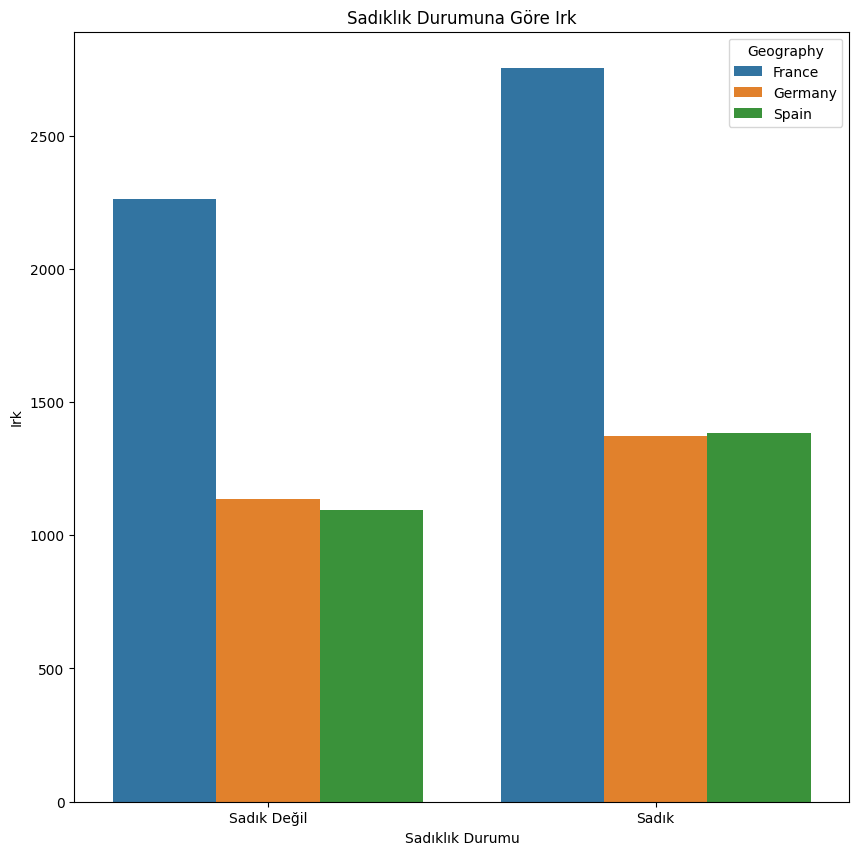

In [24]:
# şimdi de sadıklık durumunun ırkla alakası var mı gözlemleyelim
plt.figure(figsize=(10,10))
plt.title("Sadıklık Durumuna Göre Irk")
plt.xlabel("Sadıklık Durumu")
plt.ylabel("Irk")
sns.countplot(x="SadıklıkDurumu",hue="Geography",data=data)
plt.show()

In [25]:
# buna bir de istatistiksel test uygulayalım
soru2 = chi2_contingency(pd.crosstab(data["Geography"],data["SadıklıkDurumu"]))
# H0: İlişki Yoktur
# H1: İlişki Vardır

In [26]:
soru2.pvalue
# burada p değerimiz "0.689" çıktı yani 0.05'ten büyük olduğu için H0 hipotezini reddedemiyoruz.

0.689551789243679

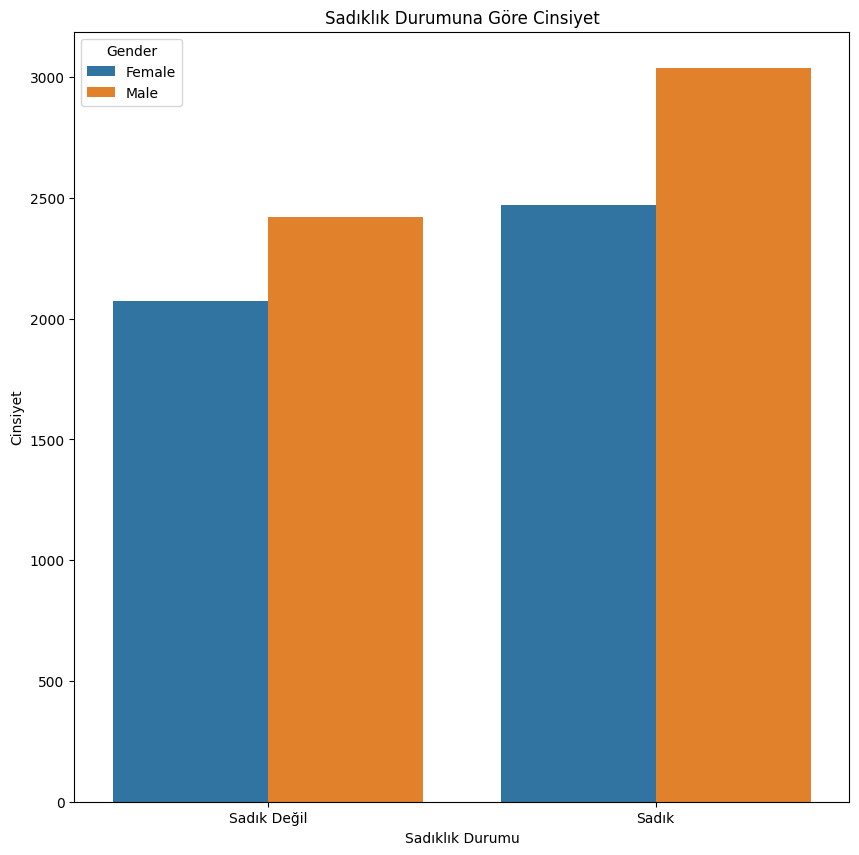

In [27]:
# Sadıklık durumu Cinsiyetle alakalı mı ?
plt.figure(figsize=(10,10))
plt.title("Sadıklık Durumuna Göre Cinsiyet")
plt.xlabel("Sadıklık Durumu")
plt.ylabel("Cinsiyet")
sns.countplot(x="SadıklıkDurumu",hue="Gender",data=data)
plt.show()


In [28]:
# buna da istatistiksel test uygulayalım
soru3 = chi2_contingency(pd.crosstab(data["Gender"],data["SadıklıkDurumu"]))
# H0: İlişki Yoktur
# H1: İlişki Vardır


In [29]:
soru3.pvalue
# burada p değerimiz "0.21" çıktı yani 0.05'ten büyük olduğu için H0 hipotezini reddedemiyoruz.

0.2125356579824753

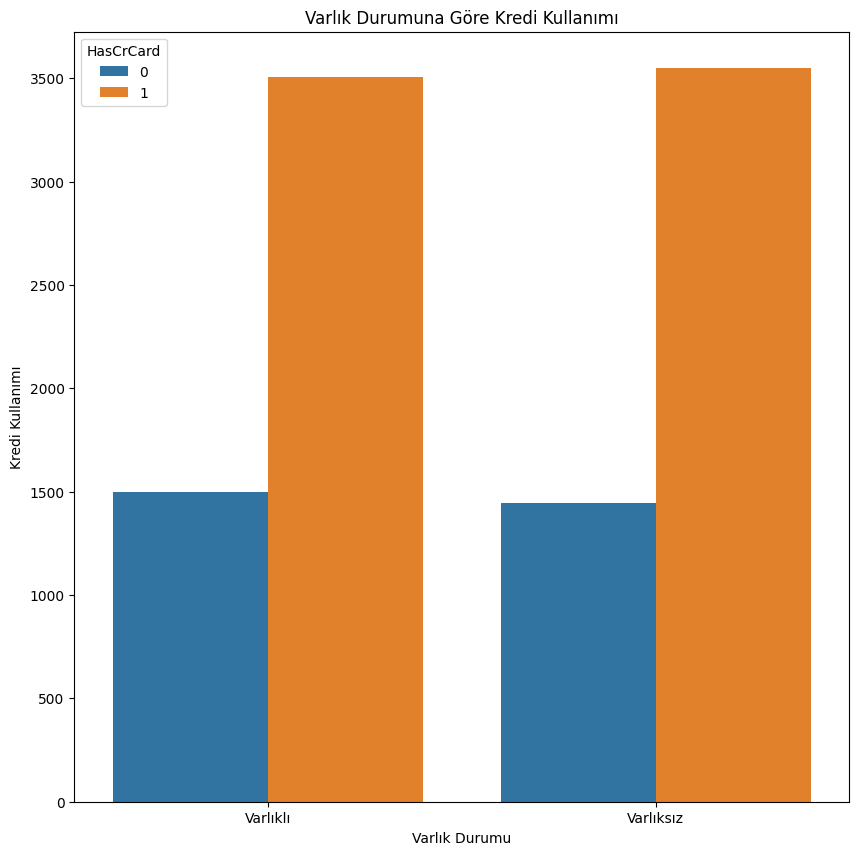

In [30]:
# Varlık durumunun kredi kullanımına etkisi var mı ?
plt.figure(figsize=(10,10))
plt.title("Varlık Durumuna Göre Kredi Kullanımı")
plt.xlabel("Varlık Durumu")
plt.ylabel("Kredi Kullanımı")
sns.countplot(x="ZenginlikDurumu",hue="HasCrCard",data=data)
plt.show()


In [31]:
# buna da istatistiksel test uygulayalım
soru4 = chi2_contingency(pd.crosstab(data["HasCrCard"],data["ZenginlikDurumu"]))
# H0: İlişki Yoktur
# H1: İlişki Vardır

In [32]:
soru4.pvalue
# Burada 0.27 çıktı yani 0.05'ten büyük olduğu için H0 hipotezini reddedemiyoruz.

0.2738530419733728

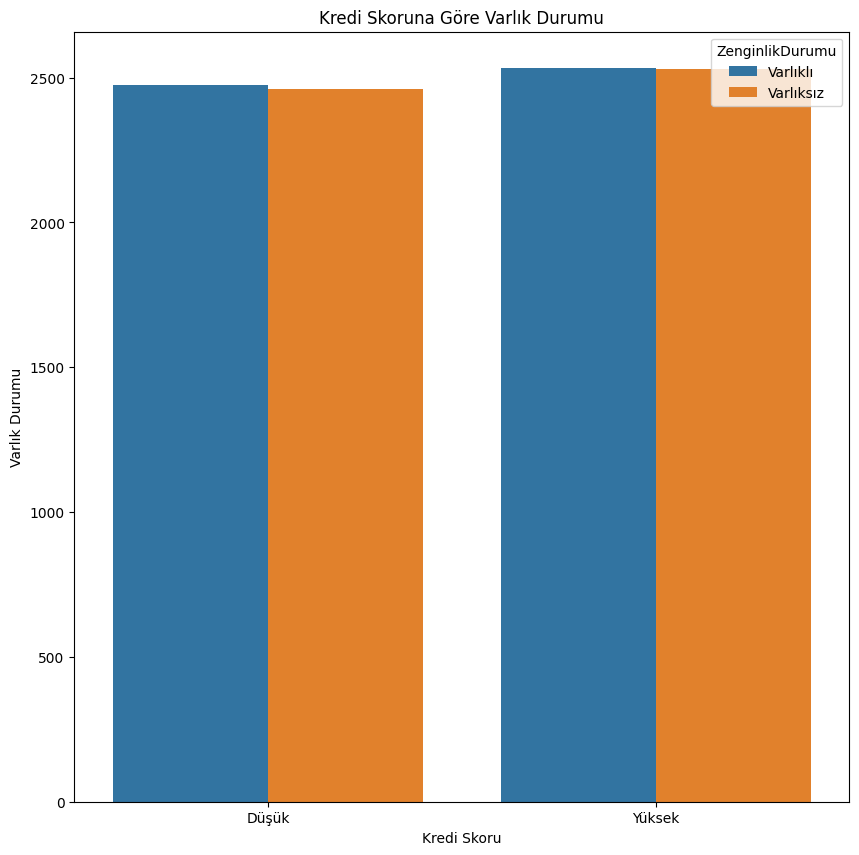

In [33]:
# peki kredi skorunun varlıkla alakası var mı ?
plt.figure(figsize=(10,10))
plt.title("Kredi Skoruna Göre Varlık Durumu")
plt.xlabel("Kredi Skoru")
plt.ylabel("Varlık Durumu")
sns.countplot(x="KrediSkorDurumu",hue="ZenginlikDurumu",data=data)
plt.show()

In [34]:
# buna da istatistiksel test uygulayalım
soru5 = chi2_contingency(pd.crosstab(data["KrediSkorDurumu"],data["ZenginlikDurumu"]))
# H0: İlişki Yoktur
# H1: İlişki Vardır

In [35]:
soru5.pvalue
# Burada 0.91 çıktı yani 0.05'ten büyük olduğu için H0 hipotezini reddedemiyoruz.

0.9189375091235191

In [36]:
#### ÇÖZÜMLER

In [37]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Düşük,Sadık Değil,Varlıklı,Yüksek
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Düşük,Sadık Değil,Varlıklı,Yüksek
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Düşük,Sadık,Varlıklı,Yüksek
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek,Sadık Değil,Varlıksız,Düşük
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Yüksek,Sadık Değil,Varlıksız,Düşük


In [40]:
# burada X yaşından küçük kadınlara "Moda kredisi " adı altında bir teklif sunmak isteyelim bize bu kriterlere uygun müşterileri getirecek bir fonksiyon yazalım 
def ModaKredisi(X,df):
    modaKredisi = data[(data["Age"] < X) & (data["Gender"]=="Female")]     
    return modaKredisi

In [41]:
krediTeklifiX1 = ModaKredisi(30,data)

In [ ]:
krediTeklifiX1[
    (krediTeklifiX1["IsActiveMember"] == 1) & (krediTeklifiX1["Exited"] == 0) & (krediTeklifiX1["HasCrCard"] == 1) & (krediTeklifiX1["KrediSkorDurumu"] == "Yüksek") & (krediTeklifiX1["SadıklıkDurumu"] == "Sadık Değil") & (krediTeklifiX1["ZenginlikDurumu"] == "Varlıksız")
]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
998,15659557,Artamonova,811,Germany,Female,28,4,167738.82,2,1,1,9903.42,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1134,15732660,Black,769,France,Female,27,2,0.00,1,1,1,57876.05,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1213,15624229,Noble,694,France,Female,22,4,0.00,2,1,1,11525.72,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1412,15588986,Grant,673,Germany,Female,29,4,99097.36,1,1,1,9796.69,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1472,15729956,Akabueze,726,Spain,Female,26,1,80780.16,1,1,1,19225.85,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2001,15734311,Hamilton,661,France,Female,27,3,0.00,2,1,1,76889.79,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2324,15748116,Zetticci,681,France,Female,29,2,148143.84,1,1,1,52021.39,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2422,15607837,Muriel,746,France,Female,29,4,105599.67,1,1,1,43106.17,0,Yüksek,Sadık Değil,Varlıksız,Düşük
3031,15638963,Garran,678,France,Female,22,4,174852.89,1,1,1,28149.06,0,Yüksek,Sadık Değil,Varlıksız,Düşük
3800,15685314,Noble,850,France,Female,28,2,0.00,2,1,1,38773.74,0,Yüksek,Sadık Değil,Varlıksız,Düşük


In [ ]:
# Burada ise X yaşından küçük erkeklere "Teknoloji Kredisi" adı altında bir teklif sunmak isteyelim bize bu kriterlere uygun müşterileri getirecek bir fonksiyon yazalım
def TeknolojiKredisi(X,df):
    teknolojiKredisi = data[
        (data["Age"] < X) & ( data["Gender"] == "Male")
    ]
    return teknolojiKredisi

In [ ]:
krediTeklifiX2 = TeknolojiKredisi(30,data)

In [ ]:
krediTeklifiX2

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Yüksek,Sadık Değil,Varlıksız,Düşük
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,Düşük,Sadık Değil,Varlıksız,Düşük
25,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0,Düşük,Sadık Değil,Varlıklı,Yüksek
29,15656300,Lucciano,411,France,Male,29,0,59697.17,2,1,1,53483.21,0,Düşük,Sadık Değil,Varlıksız,Düşük
57,15647091,Endrizzi,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0,Yüksek,Sadık Değil,Varlıksız,Düşük
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,15672237,Oluchi,633,France,Male,25,1,0.00,1,1,0,100598.98,0,Düşük,Sadık Değil,Varlıklı,Yüksek
9972,15747927,Ch'in,758,France,Male,26,4,155739.76,1,1,0,171552.02,0,Yüksek,Sadık Değil,Varlıklı,Yüksek
9973,15806455,Miller,611,France,Male,27,7,0.00,2,1,1,157474.10,0,Düşük,Sadık,Varlıklı,Yüksek
9989,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,Yüksek,Sadık Değil,Varlıklı,Yüksek


In [ ]:
krediTeklifiX2[
    (krediTeklifiX2["IsActiveMember"] == 1) & (krediTeklifiX2["Exited"] == 0) & (krediTeklifiX2["HasCrCard"] == 1) & (krediTeklifiX2["KrediSkorDurumu"] == "Yüksek") & (krediTeklifiX2["SadıklıkDurumu"] == "Sadık Değil") & (krediTeklifiX2["ZenginlikDurumu"] == "Varlıksız")
]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Yüksek,Sadık Değil,Varlıksız,Düşük
479,15797736,Smith,658,France,Male,29,4,80262.60,1,1,1,20612.82,0,Yüksek,Sadık Değil,Varlıksız,Düşük
549,15600651,Ijendu,749,France,Male,24,1,0.00,3,1,1,47911.03,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1088,15645517,Philip,850,Spain,Male,22,2,0.00,2,1,1,9684.52,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1280,15671590,H?,741,Spain,Male,25,4,0.00,2,1,1,73873.65,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1327,15688007,Liu,703,Spain,Male,20,3,165260.98,1,1,1,41626.78,0,Yüksek,Sadık Değil,Varlıksız,Düşük
1989,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2136,15621893,Bellucci,727,France,Male,18,4,133550.67,1,1,1,46941.41,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2292,15779064,Chidiegwu,677,France,Male,27,2,0.00,2,1,1,20092.89,0,Yüksek,Sadık Değil,Varlıksız,Düşük
2328,15664204,Meany,706,Spain,Male,29,2,0.00,2,1,1,18255.51,0,Yüksek,Sadık Değil,Varlıksız,Düşük


In [ ]:
# Burada da bakiyesi Tahmini maaş'dan küçük olanlara "İhtiyaç kredisi" adı altında kredi teklifi sunalım
def İhtiyacKredisi(df):
    ihtiyaçKredisi = data[
        (data["Balance"] < data["EstimatedSalary"])
    ]
    return ihtiyaçKredisi

In [ ]:
krediTeklifiX3 = İhtiyacKredisi(data)

In [ ]:
krediTeklifiX3[
    (krediTeklifiX3["IsActiveMember"] == 1) & (krediTeklifiX3["Exited"] == 0) & (krediTeklifiX3["HasCrCard"] == 1) & (krediTeklifiX3["KrediSkorDurumu"] == "Yüksek") & (krediTeklifiX3["SadıklıkDurumu"] == "Sadık Değil") & (krediTeklifiX3["ZenginlikDurumu"] == "Varlıksız")
]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
411,15760431,Pino,850,France,Male,38,1,0.00,2,1,1,80006.65,0,Yüksek,Sadık Değil,Varlıksız,Düşük
456,15747960,Eluemuno,733,France,Male,33,3,0.00,1,1,1,7666.73,0,Yüksek,Sadık Değil,Varlıksız,Düşük
529,15694272,Nkemakolam,673,France,Male,30,1,64097.75,1,1,1,77783.35,0,Yüksek,Sadık Değil,Varlıksız,Düşük
549,15600651,Ijendu,749,France,Male,24,1,0.00,3,1,1,47911.03,0,Yüksek,Sadık Değil,Varlıksız,Düşük
558,15717046,Wentworth-Shields,741,Spain,Male,53,3,0.00,2,1,1,38913.68,0,Yüksek,Sadık Değil,Varlıksız,Düşük
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,15603883,Ch'in,818,France,Male,36,4,0.00,2,1,1,8037.03,0,Yüksek,Sadık Değil,Varlıksız,Düşük
9857,15779423,K?,716,France,Male,39,1,70657.61,2,1,1,76476.05,0,Yüksek,Sadık Değil,Varlıksız,Düşük
9867,15620936,Warren,787,France,Male,32,4,0.00,2,1,1,13238.93,0,Yüksek,Sadık Değil,Varlıksız,Düşük
9943,15659495,Fu,784,Spain,Male,23,2,0.00,1,1,1,6847.73,0,Yüksek,Sadık Değil,Varlıksız,Düşük


In [ ]:
# Burada da Hesabı olan ama kredi kartı olmayan, kredi skoru yüksek ve varlığı ortalama maaştan düşük olanlara "Kredi Kartı" adı altında kredi teklifi sunalım
def KrediKartı(df):
    krediKartı = data[
        (data["HasCrCard"] == 0) & (data["KrediSkorDurumu"] == "Yüksek") & (data["VarlığıOrtalamaMaaştanDüşük"] == "Düşük")
    ]
    return krediKartı

In [ ]:
krediTeklifiX4 = KrediKartı(data)

In [ ]:
krediTeklifiX4

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Yüksek,Sadık Değil,Varlıksız,Düşük
23,15725737,Mosman,669,France,Male,46,3,0.00,2,0,1,8487.75,0,Yüksek,Sadık Değil,Varlıksız,Düşük
37,15729599,Lorenzo,804,Spain,Male,33,7,76548.60,1,0,1,98453.45,0,Yüksek,Sadık,Varlıksız,Düşük
57,15647091,Endrizzi,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0,Yüksek,Sadık Değil,Varlıksız,Düşük
60,15651280,Hunter,742,Germany,Male,35,5,136857.00,1,0,0,84509.57,0,Yüksek,Sadık,Varlıksız,Düşük
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,15594612,Flynn,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1,Yüksek,Sadık,Varlıksız,Düşük
9979,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0,Yüksek,Sadık Değil,Varlıksız,Düşük
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,Yüksek,Sadık,Varlıksız,Düşük
9986,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,Yüksek,Sadık Değil,Varlıksız,Düşük


In [ ]:
# burada da ise uzun süreli müşterimiz olup kredi kartı kullanmayanlara özel "Sürekli Kredi Kartı" adı altında kredi teklifi sunalım
def surekliKrediKartı(df):
    surekliKrediKartı = data[
        (data["SadıklıkDurumu"] == "Sadık") & (data["HasCrCard"] == 0)
    ]
    return surekliKrediKartı

In [ ]:
krediTeklifiX5 = surekliKrediKartı(data)

In [ ]:
krediTeklifiX5

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,KrediSkorDurumu,SadıklıkDurumu,ZenginlikDurumu,VarlığıOrtalamaMaaştanDüşük
10,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,Düşük,Sadık,Varlıksız,Düşük
13,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0,Düşük,Sadık,Varlıklı,Yüksek
18,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,Düşük,Sadık,Varlıklı,Yüksek
27,15700772,Nebechi,571,France,Male,44,9,0.00,2,0,0,38433.35,0,Düşük,Sadık,Varlıksız,Düşük
31,15706552,Odinakachukwu,533,France,Male,36,7,85311.70,1,0,1,156731.91,0,Düşük,Sadık,Varlıklı,Yüksek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,15642785,Douglas,479,France,Male,34,5,117593.48,2,0,0,113308.29,0,Düşük,Sadık,Varlıklı,Yüksek
9968,15733491,McGregor,512,Germany,Female,40,8,153537.57,2,0,0,23101.13,0,Düşük,Sadık,Varlıksız,Düşük
9969,15806360,Hou,609,France,Male,41,6,0.00,1,0,1,112585.19,0,Düşük,Sadık,Varlıklı,Yüksek
9980,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,Yüksek,Sadık,Varlıksız,Düşük
